In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

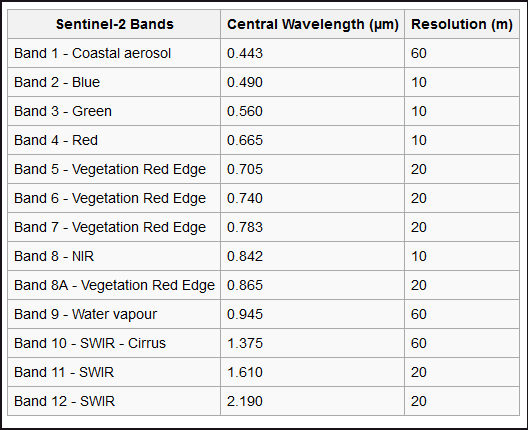

In [2]:
df_ndvi = pd.read_csv("data/train/NDVI.csv", encoding="windows-1251").drop(columns=["index"])

In [3]:
days = list(df_ndvi.select_dtypes(include="number"))
for day in days:
    df_ndvi[day] = df_ndvi[day].fillna(df_ndvi[day].mean())

df_ndvi.isna().sum()


121        0
128        0
135        0
142        0
149        0
156        0
163        0
170        0
177        0
184        0
191        0
198        0
205        0
212        0
219        0
226        0
233        0
240        0
247        0
254        0
261        0
268        0
275        0
282        0
289        0
296        0
culture    0
dtype: int64

In [4]:
pivot = pd.pivot_table(df_ndvi, df_ndvi.select_dtypes(include="number"), "culture")
pivot

,121,128,135,142,149,156,163,170,177,184,...,233,240,247,254,261,268,275,282,289,296
culture,,,,,,,,,,,,,,,,,,,,,
залежь,0.230916,0.280619,0.367859,0.488283,0.582498,0.652679,0.681818,0.717440,0.725158,0.765482,...,0.741362,0.741469,0.720115,0.694697,0.655198,0.586695,0.491828,0.455392,0.359882,0.362023
зерновые,0.223676,0.207941,0.249734,0.258973,0.305928,0.393925,0.568195,0.583088,0.636132,0.647037,...,0.479542,0.504653,0.472780,0.411360,0.417409,0.424599,0.422544,0.444484,0.405379,0.380566
кукуруза,0.232768,0.239185,0.240176,0.260085,0.240954,0.223868,0.237927,0.268302,0.337058,0.411696,...,0.789975,0.850020,0.739839,0.520435,0.417042,0.339335,0.317167,0.290195,0.273450,0.236373
многолетние травы,0.288581,0.369720,0.447072,0.548372,0.624637,0.654058,0.705478,0.749385,0.727266,0.672341,...,0.781730,0.762278,0.749791,0.724035,0.713292,0.698858,0.624292,0.659091,0.570079,0.570607
овощи,0.213154,0.227626,0.240123,0.236378,0.236910,0.266411,0.289142,0.295250,0.421102,0.473484,...,0.734859,0.752257,0.556655,0.448634,0.417798,0.320727,0.321058,0.308741,0.271171,0.222406
соя,0.239310,0.261209,0.293363,0.327179,0.338155,0.311700,0.321641,0.349529,0.441256,0.482526,...,0.851000,0.885028,0.834925,0.732190,0.617379,0.500579,0.442310,0.423946,0.358496,0.317265


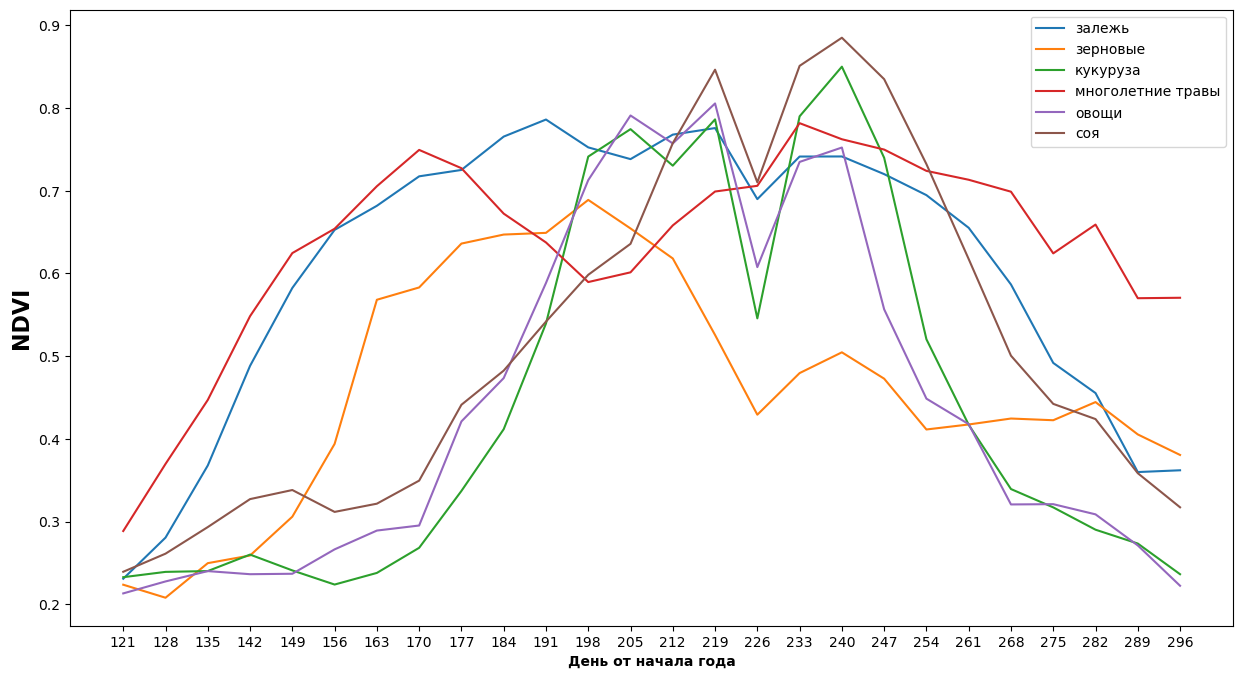

In [5]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel('День от начала года',fontsize = 10,fontweight="bold")
ax.set_ylabel('NDVI',fontsize = 16,fontweight="bold")

for culture in pivot.index:
    ax.plot(list(pivot), pivot.loc[culture], label=culture)
ax.legend()

In [6]:
df_nir = pd.read_csv("data/train/B8A.csv", encoding="windows-1251").drop(columns=["index"])
df_swir = pd.read_csv("data/train/B12.csv", encoding="windows-1251").drop(columns=["index"])

for day in days:
    df_nir[day] = df_nir[day].fillna(df_nir[day].mean())
    df_swir[day] = df_swir[day].fillna(df_swir[day].mean())

In [7]:
df_ndwi = pd.DataFrame()
df_new = pd.DataFrame()

for day in days:
    df_ndwi[f"{day}_NDWI"] = (df_nir[day] - df_swir[day]) / (df_nir[day] + df_swir[day])
    df_new[f"{day}_NEW"] = df_ndvi[day] * df_ndwi[f"{day}_NDWI"]



In [8]:
df_features = pd.concat([df_ndvi, df_ndwi], axis=1)

df_features.head()

,121,128,135,142,149,156,163,170,177,184,...,233_NDWI,240_NDWI,247_NDWI,254_NDWI,261_NDWI,268_NDWI,275_NDWI,282_NDWI,289_NDWI,296_NDWI
0,0.254240,0.232287,0.249031,0.254652,0.254277,0.356323,0.302102,0.261997,0.293335,0.243043,...,0.434826,0.508137,0.508409,0.142427,0.356951,0.244736,0.325066,0.141581,0.294194,0.021467
1,0.226222,0.267632,0.287176,0.212295,0.193222,0.219783,0.300802,0.356491,0.443714,0.562010,...,0.479277,0.563585,0.734832,0.543435,0.323434,0.227638,0.122519,-0.248328,0.352862,-0.119033
2,0.196713,0.185725,0.140135,0.191388,0.163758,0.373368,0.302102,0.195013,0.231862,0.180890,...,0.426582,0.522956,0.410135,0.167625,0.300755,0.176114,0.319325,0.101463,0.261075,0.017954
3,0.186567,0.115344,0.144401,0.159283,0.136875,0.175118,0.302102,0.188756,0.220256,0.168195,...,0.428022,0.516386,0.489820,0.162259,0.336513,0.252001,0.315730,0.064065,0.274855,0.038358
4,0.218304,0.214468,0.212592,0.264833,0.251726,0.221614,0.234553,0.260465,0.317564,0.435179,...,0.208784,0.552213,0.356886,0.206686,0.417060,0.339121,0.330784,-0.231754,0.365094,0.055362


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

encoder = OneHotEncoder()

x = df_features.drop(columns=["culture"])
# y = pd.DataFrame(encoder.fit_transform(df_features[['culture']]).toarray(), columns=encoder.get_feature_names_out(['culture']))
y = df_features["culture"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# from sklearn.linear_model import PassiveAggressiveClassifier

clfs = [RandomForestClassifier(), KNeighborsClassifier()]
for clf in clfs:
    clf.fit(x_train, y_train)

In [11]:
answers = []
ans_df = pd.DataFrame()
for clf in clfs:
    ans = clf.predict(x_test)
    ans_df[type(clf).__name__] = ans
    answers.append(ans)
    
ans_df.mode(axis=1)

,0,1
0,многолетние травы,NaN
1,залежь,NaN
2,овощи,NaN
3,кукуруза,NaN
4,кукуруза,соя
...,...,...
2174,кукуруза,NaN
2175,зерновые,NaN
2176,соя,NaN
2177,овощи,NaN


In [12]:
def row_mode(row):
    return row.mode()[0]

ans_df["Mode"] = ans_df.apply(row_mode, axis=1)


In [13]:
from sklearn.metrics import classification_report, f1_score

for clf in list(ans_df):
    print(clf, classification_report(y_test, ans_df[clf], digits=4), sep="\n")

RandomForestClassifier
                   precision    recall  f1-score   support

           залежь     0.9417    0.9831    0.9620       296
         зерновые     0.9920    0.9661    0.9788       383
         кукуруза     1.0000    0.9887    0.9943       355
многолетние травы     0.9909    0.9864    0.9886       441
            овощи     0.9921    0.9960    0.9941       252
              соя     0.9780    0.9823    0.9801       452

         accuracy                         0.9830      2179
        macro avg     0.9824    0.9838    0.9830      2179
     weighted avg     0.9833    0.9830    0.9831      2179

KNeighborsClassifier
                   precision    recall  f1-score   support

           залежь     0.8994    0.9966    0.9455       296
         зерновые     0.9946    0.9634    0.9788       383
         кукуруза     0.9972    0.9944    0.9958       355
многолетние травы     0.9842    0.9909    0.9876       441
            овощи     0.9843    0.9960    0.9901       252
        